# Визуализацияв Marplotlib и Seaborn

### Полезные ссылки:  
лекция https://gb.ru/lessons/316585  
семинар https://gb.ru/lessons/318517  

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Данные из прошлого дз
1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой
2.1.4 Изучите распределение года постройки

Условие 2: 2 задача

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 1.1. Данные из прошлого дз

In [80]:
# 1.1. Данные из прошлого дз

df = pd.read_csv('kc_house_data.csv', sep = ',', encoding='latin-1')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**1.2 Изучите стоимости недвижимости**

In [82]:
df['price_TH_$'] = df['price'] / 1000 

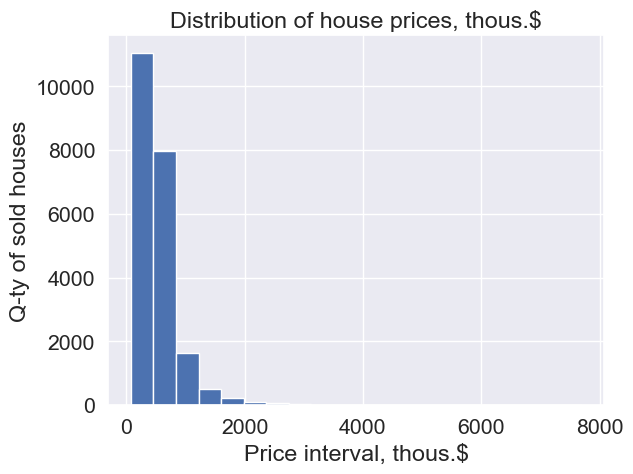

In [83]:
#построим гистограмму, показывающую распределение цены
plt.hist(df['price_TH_$'], bins = 20)
plt.title('Distribution of house prices, thous.$')
plt.xlabel('Price interval, thous.$')
plt.ylabel('Q-ty of sold houses');
plt.minorticks_on()

На первый взгляд, чем меньше стоят, дома тем больше их покупают

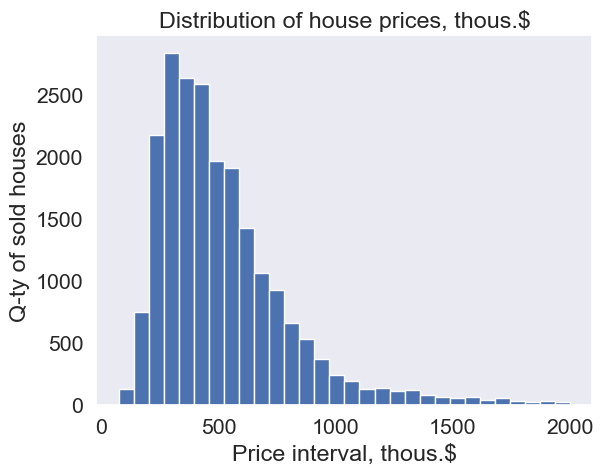

In [84]:
#построим гистограмму, показывающую распределение цены

plt.hist(df[df['price_TH_$'] < 2000]['price_TH_$'], bins = 30)
plt.title('Distribution of house prices, thous.$')
plt.xlabel('Price interval, thous.$')
plt.ylabel('Q-ty of sold houses');
plt.grid()
plt.minorticks_on()

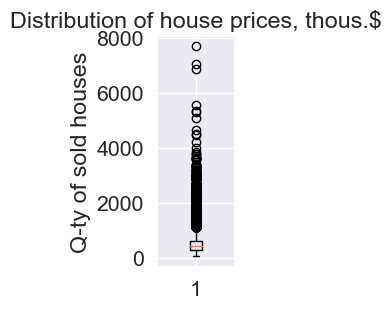

In [85]:
# Посмотрим распределение на боксплоте
plt.figure(figsize=(1, 3))
plt.boxplot(df['price_TH_$'])
plt.ylabel('Q-ty of sold houses');
plt.title('Distribution of house prices, thous.$');

Text(0.6, 450.0, 'Median: 450')

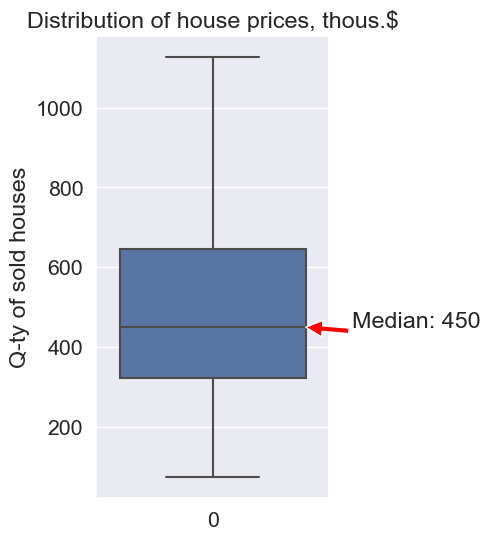

In [86]:
# Уберем выбросы
plt.figure(figsize=(3, 6))

sns.boxplot(df['price_TH_$'], showfliers=False)
plt.title('Distribution of house prices, thous.$')
plt.ylabel('Q-ty of sold houses');

# Добавляем значение медианы
median = np.median(df['price_TH_$'])
plt.annotate(f'Median: {median:.0f}', 
            xy=(0.4, median), #положение подписываемой штуки
            xytext=(0.6, median), #положение подписи  
            arrowprops=dict(facecolor='red', shrink=0))#формат стрелочки;

In [87]:
df['price_TH_$'].describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price_TH_$, dtype: float64

Было продано 21.613 домов стоимостью от 75 до 7.700 тыс.дол.  
Среднеарифметическая стоимость проданных домов - 540 тыс.дол.   
Медианная стоимость - 450 тыс.дол. (средняя стоимость невилирующая влияние выбросов) 
Наиболее продаваемые дома стоимостью около 260 тыс. дол. (на графике не видно четче сам интервал)

**1.3 Изучите распределение квадратуры жилой площади**  
здесь попрактикуемся в seaborn

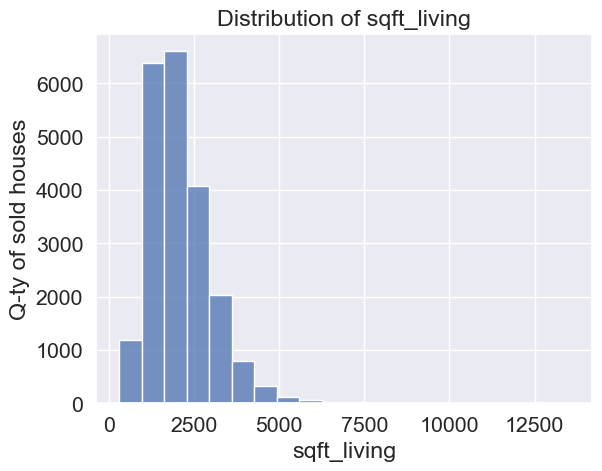

In [88]:
#построим гистограмму, показывающую распределение цены
sns.histplot(df['sqft_living'], bins = 20)
plt.title('Distribution of sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Q-ty of sold houses');
plt.minorticks_on()

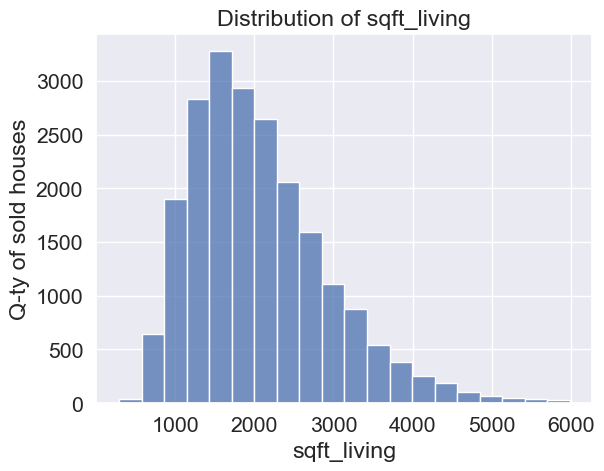

In [89]:
#построим гистограмму, показывающую распределение цены до 6000кв.м
sns.histplot(df[df['sqft_living'] < 6000]['sqft_living'], bins = 20)
plt.title('Distribution of sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Q-ty of sold houses');
plt.minorticks_on()

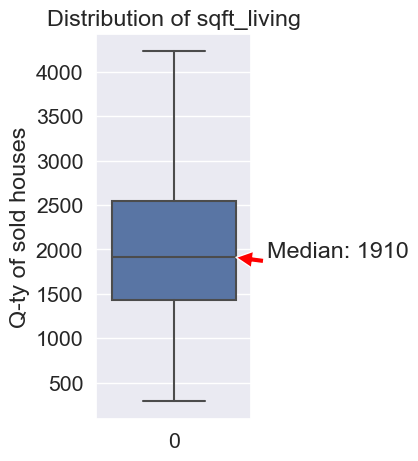

In [90]:
plt.figure(figsize=(2, 5))
sns.boxplot(df['sqft_living'], showfliers=False)
plt.ylabel('Q-ty of sold houses')

# Добавляем значение медианы
median = np.median(df['sqft_living'])
plt.annotate(f'Median: {median:.0f}', 
            xy=(0.4, median), #положение подписываемой штуки
            xytext=(0.6, median), #положение подписи  
            arrowprops=dict(facecolor='red', shrink=0))#формат стрелочки

plt.title('Distribution of sqft_living');

In [91]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Было продано 21.613 c жилой площадью от 290 до 13.540 кв.м.  
Среднеарифметическая жилая площзадь проданных домов - 2.080 кв.м.      
Медианная жилая площадь - 1.910 кв.м. (невилируя влияние выбросов) 
Наиболее продаваемые дома с жилой площадью около 1400 - 1700 м. кв. (на графике не видно более четко сам интервал)

**1.4 Изучите распределение года постройки**

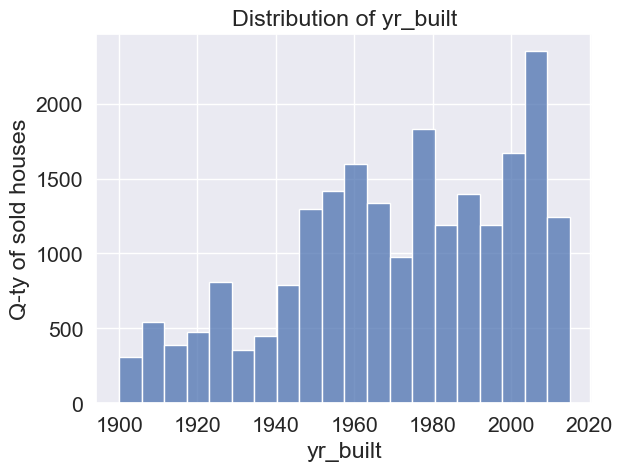

In [92]:
#построим гистограмму, показывающую распределение года постройки
sns.histplot(df['yr_built'], bins = 20)
plt.title('Distribution of yr_built')
plt.xlabel('yr_built')
plt.ylabel('Q-ty of sold houses');
plt.minorticks_on()

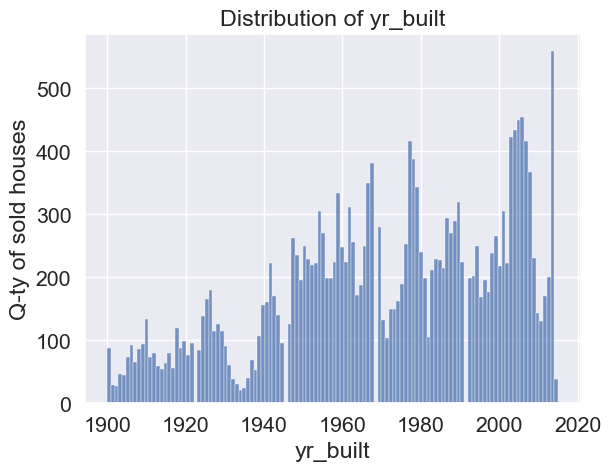

In [93]:
sns.histplot(df['yr_built'], bins = 120)
plt.title('Distribution of yr_built')
plt.xlabel('yr_built')
plt.ylabel('Q-ty of sold houses');
plt.minorticks_on()

In [94]:
df['yr_built'].mode()

0    2014
Name: yr_built, dtype: int64

''

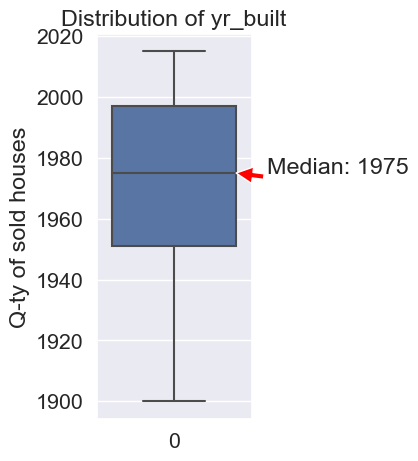

In [95]:
plt.figure(figsize=(2, 5))
sns.boxplot(df['yr_built'], showfliers=False)
plt.title('Distribution of yr_built')
plt.ylabel('Q-ty of sold houses');

# Добавляем значение медианы
median = np.median(df['yr_built'])
plt.annotate(f'Median: {median:.0f}', 
            xy=(0.4, median), #положение подписываемой штуки
            xytext=(0.6, median), #положение подписи  
            arrowprops=dict(facecolor='red', shrink=0))#формат стрелочки
;

In [96]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

Было продано 21.613, построенных с 1900 по 2015г.  
Среднеарифметический и медианных год постройки проданного дома составляет 1971 и 1975 соответственно.

Наиболее продаваемые дома - дома построенные в интервале 2004-2009г.  
Дома, построенные в 2014г - самые продаваемые.

**2.1 Изучите распределение домов от наличия вида на набережную**

In [97]:
counts = df['waterfront'].value_counts()
counts.index = ['without waterfront view', 'with waterfront view']
counts

without waterfront view    21450
with waterfront view         163
Name: waterfront, dtype: int64

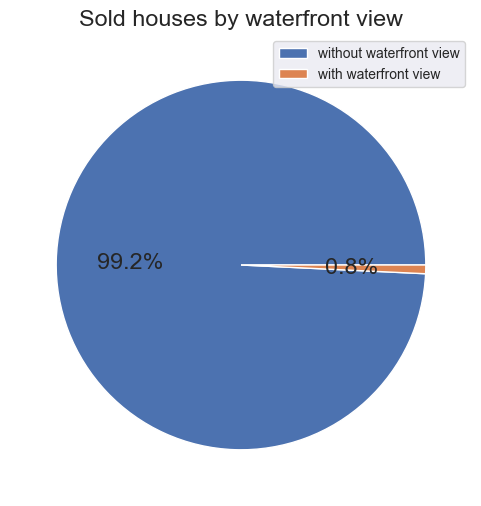

In [98]:
plt.figure(figsize=(15, 6))
plt.pie(counts, autopct='%1.1f%%')
plt.title('Sold houses by waterfront view')
plt.legend(counts.index, loc='upper right', fontsize=10);

С видом на набережную лишь 0,8% проданных домов.

**2.2 Изучите распределение этажей домов**

In [99]:
counts = df['floors'].value_counts().sort_index()
counts

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

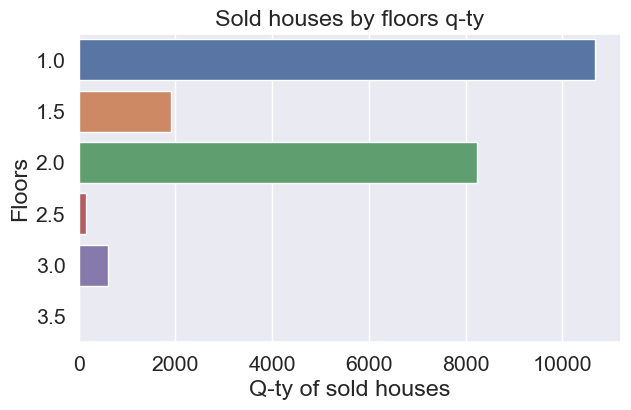

In [100]:
plt.figure(figsize=(7, 4))
sns.barplot(y=counts.index, x=counts.values, orient='h')
plt.xlabel('Q-ty of sold houses')
plt.ylabel('Floors')
plt.title('Sold houses by floors q-ty');


In [101]:
counts = df['floors'].value_counts().sort_index().reset_index()
counts.rename(columns = {'index':'floors', 'floors':'q-ty sold houses, pc'}, inplace = True )
total = counts['q-ty sold houses, pc'].sum()
counts['q-ty sold houses, %'] = (counts['q-ty sold houses, pc'] / total *100).round(2)
counts

,floors,"q-ty sold houses, pc","q-ty sold houses, %"
0,1.0,10680,49.41
1,1.5,1910,8.84
2,2.0,8241,38.13
3,2.5,161,0.74
4,3.0,613,2.84
5,3.5,8,0.04


Больше всего продано одноэтажных домов (49%) , на втором месте 2-х этажные дома (38%), затем 1,5 и 3-х этажные (9% и 3% соответственно), дома этажностью 2,5 и 3,5 продавались реже всего (в сумме 0,8%).

**2.2 Изучите распределение состояния домов**

In [102]:
counts = df['condition'].value_counts().sort_index()
counts

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

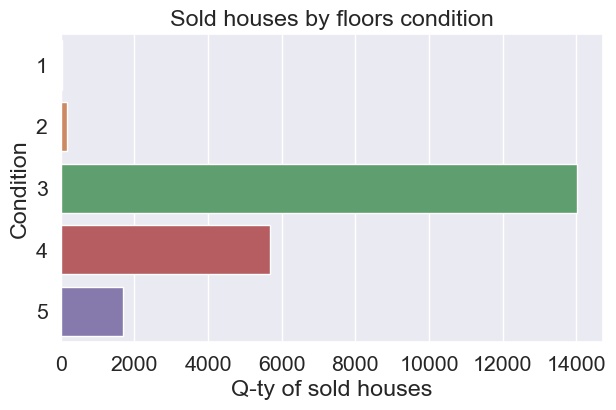

In [103]:
plt.figure(figsize=(7, 4))
sns.barplot(y=counts.index, x=counts.values, orient='h')
plt.xlabel('Q-ty of sold houses')
plt.ylabel('Condition')
plt.title('Sold houses by floors condition');

In [104]:
counts = df['condition'].value_counts().sort_index().reset_index()
counts.rename(columns = {'index':'condition', 'condition':'q-ty sold houses, pc'}, inplace = True )
total = counts['q-ty sold houses, pc'].sum()
counts['q-ty sold houses, %'] = (counts['q-ty sold houses, pc'] / total *100).round(2)
counts

,condition,"q-ty sold houses, pc","q-ty sold houses, %"
0,1,30,0.14
1,2,172,0.80
2,3,14031,64.92
3,4,5679,26.28
4,5,1701,7.87


Больше всего продано домов 3 состояни (65%) , на втором месте дома 4 состояния (26%), затем 5 состояния (8%), дома 1 и 2 состояния продавались реже всего (в сумме 0,94%).

## 3. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости

In [105]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

C:\Users\Nadezhda\AppData\Local\Temp\ipykernel_12136\1202795619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


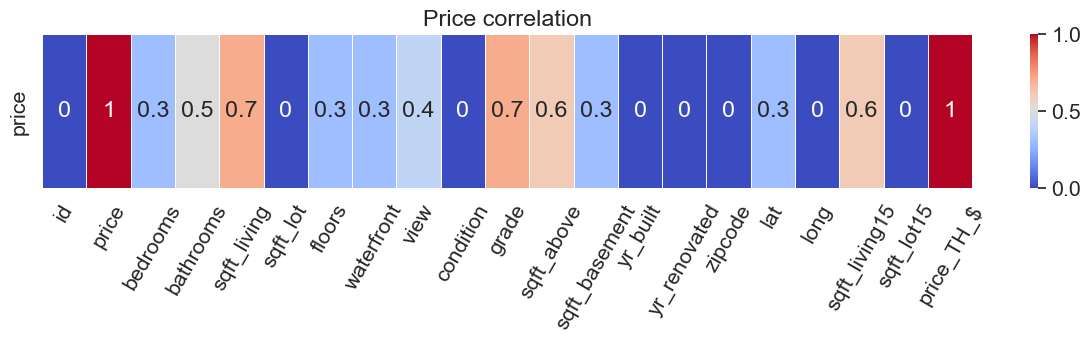

In [106]:
plt.figure(figsize=(15, 2))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix[1:2], annot=True, linewidths=.5, cmap='coolwarm')
plt.xticks(rotation=60)
plt.title('Price correlation');

Корреляция отражает только линейную зависимость.  
Проанализируем связи в более продвинутом инструменте Phik.

In [107]:
import phik
phik_overview = df.phik_matrix()
phik_overview = np.round(phik_overview, 1)
phik_overview[np.abs(phik_overview) < 0.3] = 0

interval columns not set, guessing: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_TH_$']


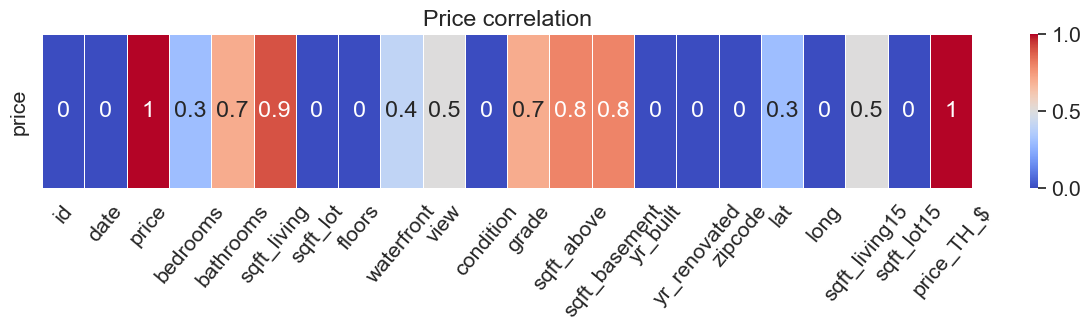

In [108]:
plt.figure(figsize=(15, 2))

sns.set(font_scale=1.4)

sns.heatmap(phik_overview[2:3], annot=True, linewidths=.5, cmap='coolwarm')
plt.xticks(rotation=50)
plt.title('Price correlation');

Phik показал нам более тесную связь цены со ванными комнатами и жилой площадью (0,7 и 0,9 против 0,5 и 0,7 соответственно), а также высокую связь цены с площадью чердака и подвала.
Но как работать с елинейными зависимостями я пока не знаю.  

<span style="color:red">**!!! Изучить и дополнить исследование для портфолио**</span>





Бедем изучать взаимосвязь цены и  
- количество ванных комнат (0,5)
- количество спален (0,3)
- жилой площади (0,7)
- оценки (grade) 0,7
- площади чердака 0,7


### 3.1. Взаимосвязь цены и количество ванных комнат (0,5)

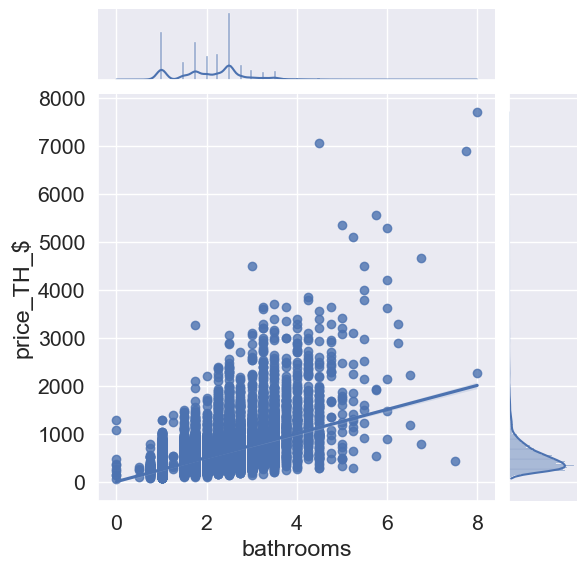

In [109]:
sns.jointplot(x=df['bathrooms'], y=df['price_TH_$'], kind='reg');
# plt.title('Взаимосвязь цены и количество ванных комнат');

In [110]:

df['bathrooms'].nunique(), df['bathrooms'].value_counts().sort_index()

(30,
 0.00      10
 0.50       4
 0.75      72
 1.00    3852
 1.25       9
 1.50    1446
 1.75    3048
 2.00    1930
 2.25    2047
 2.50    5380
 2.75    1185
 3.00     753
 3.25     589
 3.50     731
 3.75     155
 4.00     136
 4.25      79
 4.50     100
 4.75      23
 5.00      21
 5.25      13
 5.50      10
 5.75       4
 6.00       6
 6.25       2
 6.50       2
 6.75       2
 7.50       1
 7.75       1
 8.00       2
 Name: bathrooms, dtype: int64)

Кажется это не количество ванных, а какое-то интервальное значение.   
Подрежем выбросы.
Для начала найдем их.

''

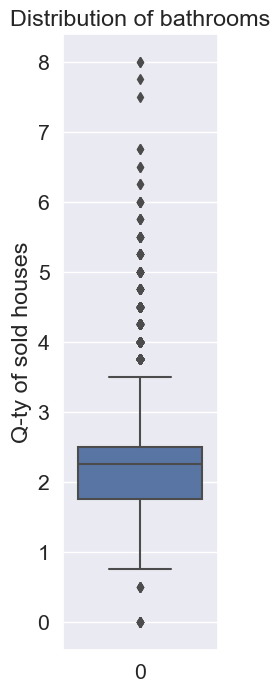

In [111]:
plt.figure(figsize=(2, 8))
sns.boxplot(df['bathrooms'])
plt.ylabel('Q-ty of sold houses')
plt.title('Distribution of bathrooms')
;


Построим joinplot без выбросов по bathroom по значениям в интервале от 0,6 до 3,6

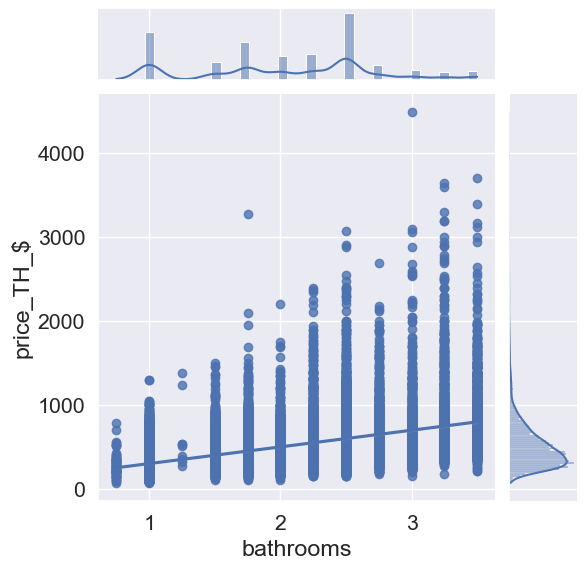

In [112]:
df_cut = df[(df['bathrooms'] < 3.7) & (df['bathrooms'] > 0.6) ]
sns.jointplot(x=df_cut['bathrooms'], y=df_cut['price_TH_$'], kind='reg');

In [113]:
df_cut['price_TH_$'].corr(df_cut['bathrooms'])

0.44721041201479594

In [114]:
df['price'].corr(df['bathrooms'])

0.5251375054139618

Прослеживается умеренная прямая линейная взаимосвязь между параметром bathrooms и ценой проданных домов.
Причем связь учитывая выбросы по bathrooms выше, чем связь без выбросов

### 3.2. Взаимосвязь цены и количества спален

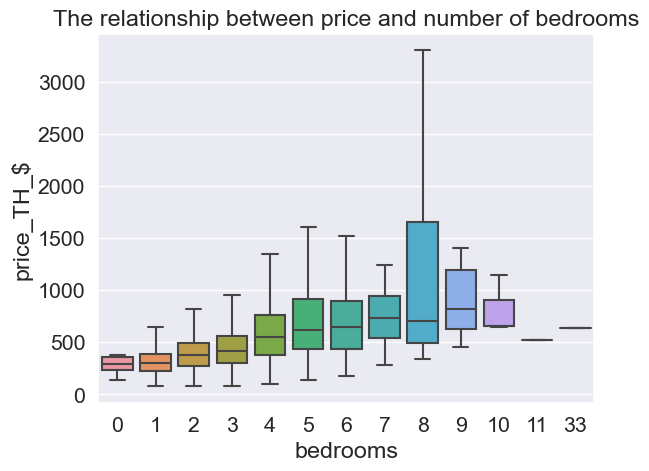

In [115]:
 # Построим boxplot, чтобы увидеть, как цены разли**3.1. Взаимосвязь цены и количество ванных комнат (0,5)**чных квартир/домов связаны c bedrooms, bathrooms, sqft_living, floors.  
sns.boxplot(x=df['bedrooms'], y=df['price_TH_$'], showfliers = False)   # bedrooms vs price boxplot  
plt.title('The relationship between price and number of bedrooms');

In [116]:
# Выведем медианную стоимость домов.
df.groupby('bedrooms').agg({'price': ['median', 'count']}).round(0).style.format("{0:,}").background_gradient(cmap='Greens')

Чем больше в доме спален, тем дороже дома.  
Однако есть интересная особенность данной закономерности: в среднем самые дорогие проданные дома - имеют 9 спален, дома с 10, 11 и 33 спальнями в среднем продавались дешевле.  
Самый большой разброс цен без учета выбросов у домов с 8 спальнями.

### 3.3. Взаимосвязь цены и жилой площади (0,7)

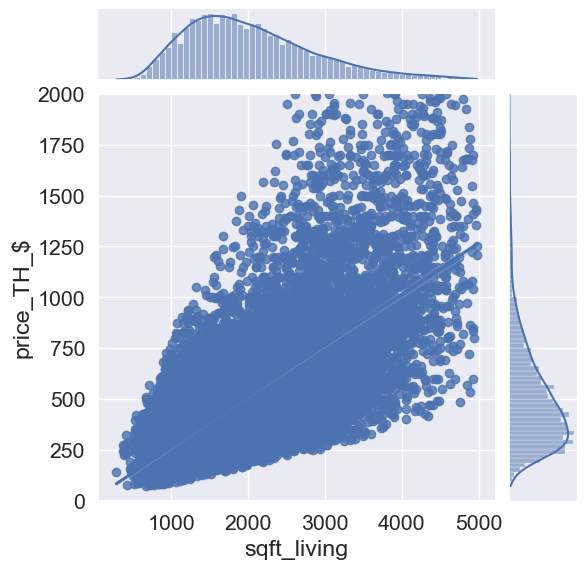

In [117]:
# добавим модель на график
df_cut = df[(df['sqft_living'] < 5000)  ]
sns.jointplot(x=df_cut['sqft_living'], y=df_cut['price_TH_$'], kind='reg');

ax = plt.gca() # чтобы настроить оси
ax.set_ylim(ymax = 2000)
ax.set_ylim(ymin = 0);

In [118]:
#построим регрессионную модель
model = LinearRegression()
X = df[['sqft_living']] #independent variable (sqft_living) 
Y = df['price'] #dependent variable (price) 
model.fit(X, Y) #fitting the model to the dataframe 
#calculating the coefficient of determination (R-squared) of the regression model  
r2 = model.score(X, Y) #R-squared value of 0.49 indicates a moderate correlation between price and sqft_living  
#calculating the formula of regression line using coefficients from the linear regression model  
b1 = model.coef_[0].round(2) #coefficient of sqft_living  
b0 = model.intercept_.round(2) #intercept  
regression_line = f'price = {b0} + {b1}*sqft_living' #formula for regression line  
print(regression_line)

price = -43580.74 + 280.62*sqft_living


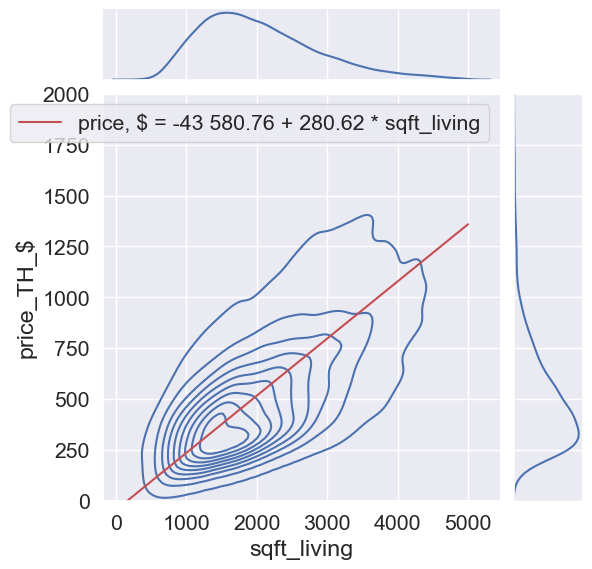

In [119]:
# добавим модель на график
df_cut = df[(df['sqft_living'] < 5000)  ]
sns.jointplot(x=df_cut['sqft_living'], y=df_cut['price_TH_$'], kind='kde');
x1 = np.arange(5000)
y1 = (-43580.74 + 280.62 * x1) / 1000
sns.lineplot(x = x1, y = y1, color = 'r', label='price, $ = -43 580.76 + 280.62 * sqft_living')
plt.legend()

ax = plt.gca() # чтобы настроить оси
ax.set_ylim(ymax = 2000)
ax.set_ylim(ymin = 0);

Существует тесная прямая взаимосвязь между ценой дома и его жилой площадью. Коээффициент коореляции = 0,7.  
Согласно построенной модели линейной регрессии с увеличением жилой площади дома на 1 м.кв. его стоимость увеличивается на 281 USD.

### 3.4. Взаимосвязь цены и оценки (0,7)

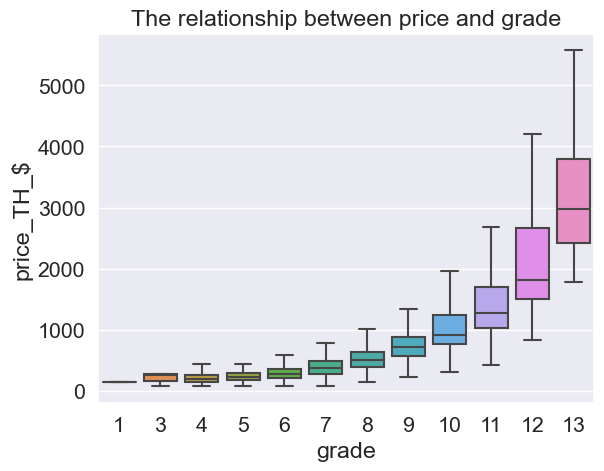

In [120]:
sns.boxplot(x=df['grade'], y=df['price_TH_$'], showfliers = False)  
plt.title('The relationship between price and grade');

In [121]:
# Выведем медианную стоимость домов по разным грейдам
df.groupby('grade').agg({'price': ['median', 'count']}).round(0).style.format("{0:,}").background_gradient(cmap='Greens')

In [122]:
#построим регрессионную модель
model = LinearRegression()
X = df[['grade']] #independent variable (sqft_living) 
Y = df['price'] #dependent variable (price) 
model.fit(X, Y) #fitting the model to the dataframe 
#calculating the coefficient of determination (R-squared) of the regression model  
r2 = model.score(X, Y) #R-squared value of 0.49 indicates a moderate correlation between price and sqft_living  
#calculating the formula of regression line using coefficients from the linear regression model  
b1 = model.coef_[0].round(2) #coefficient of sqft_living  
b0 = model.intercept_.round(2) #intercept  
regression_line = f'price = {b0} + {b1} * grade' #formula for regression line  
print(regression_line)

price = -1056044.98 + 208457.56 * grade


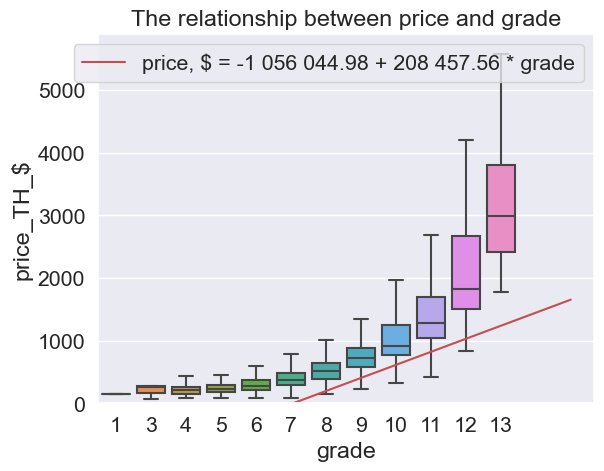

In [123]:
sns.boxplot(x=df['grade'], y=df['price_TH_$'], showfliers = False)  

x1 = np.arange(14)
y1 = (-1056044.98 + 208457.56 * x1) / 1000
sns.lineplot(x = x1, y = y1, color = 'r', label='price, $ = -1 056 044.98 + 208 457.56 * grade')
plt.legend()

ax = plt.gca() # чтобы настроить оси
ax.set_ylim(ymin = 0)
plt.title('The relationship between price and grade');

Существует тесная прямая взаимосвязь между ценой дома и его грейдом. Коээффициент коореляции = 0,7.  
График боксплотов, наглядно это демонстрирует.  
На этом графике видно некоторое противоречие этой зависимости: средняя цена проданных домов 3 грейда выше средней цене проданных домов 40ого грейда, однако это может быть обусловлениа низким количеством проданных домов 3-ого грейда (всего 3).  
Согласно построенной модели линейной регрессии с увеличениемгрейда на 1 единицу, его стоимость увеличивается на 208,5 тыс. USD.

### 3.5. Взаимосвязь цены и площади чердака (0,6)

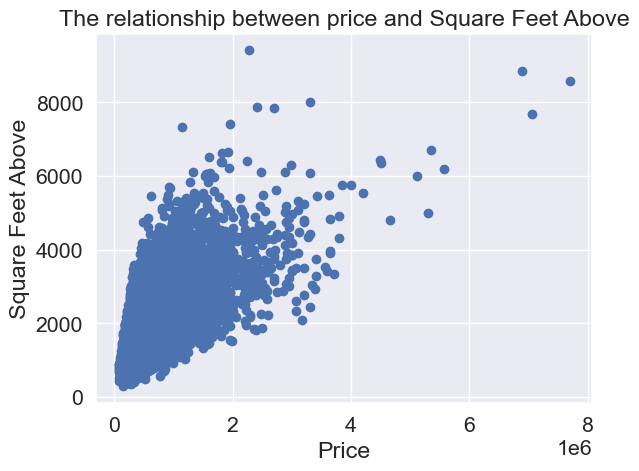

In [124]:
# Plot the relationship between price and sqft_above 
plt.scatter(df['price'], df['sqft_above'])
plt.xlabel('Price')
plt.ylabel('Square Feet Above')
plt.title('The relationship between price and Square Feet Above');


In [125]:
# Fit a linear regression model 
model = LinearRegression() 
X = df[['price']]  # independent variable 
y = df['sqft_above'] # dependent variable 
model.fit(X, y)  # fit the model 
predictions = model.predict(X) # make predictions 

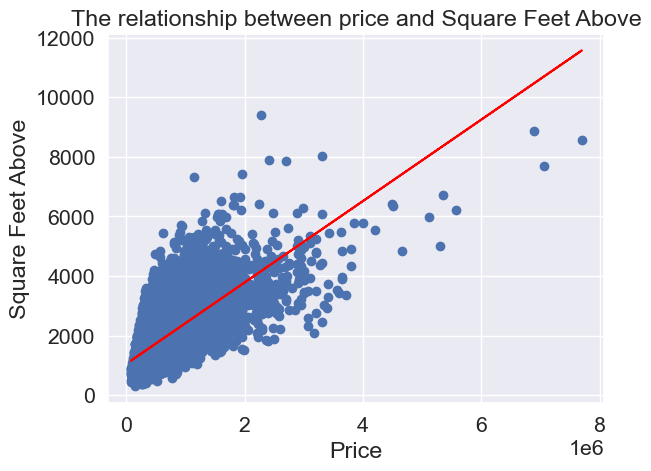

In [126]:
# Plot the regression line  
plt.scatter(X, y)   # plot the data points  
plt.plot(X, predictions, color='red')   # plot the regression line  
plt.xlabel('Price')   # label x-axis  
plt.ylabel('Square Feet Above')   # label y-axis  
plt.title('The relationship between price and Square Feet Above');


### 3.5. Взаимосвязь цены и даты продажи

In [127]:
df.insert(2, 'datetime', pd.to_datetime(df['date'])) #преобразуем числовое значение даты во временной ряд
df['datetime_month_year'] =  df['datetime'].dt.to_period('M') #добавляем признак даты, схлопнутый до года и месяца
# df.head()

In [128]:
df_grouped = df.groupby(pd.Grouper(key='datetime', axis=0, 
                      freq='M')).agg({'price_TH_$': ['min', 'mean', 'max','sum']}).round(0).reset_index()
# df_grouped


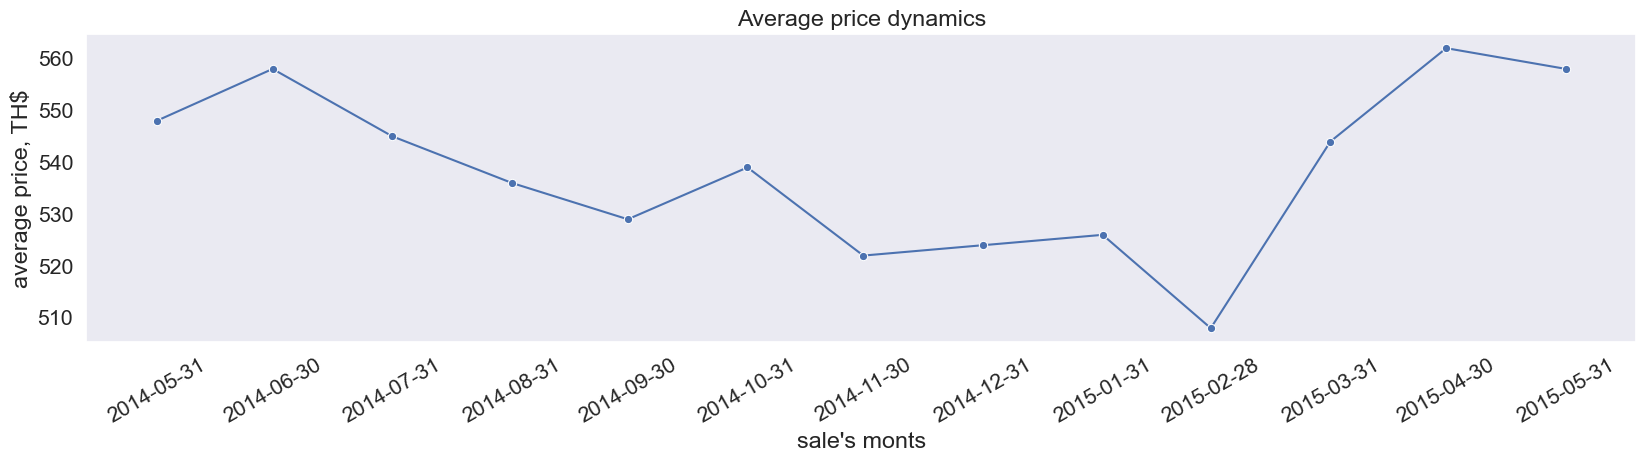

In [129]:
plt.figure(figsize=(20, 4))
sns.lineplot(x = df_grouped['datetime'], y = df_grouped['price_TH_$']['mean'], marker='o').set_xticks(df_grouped['datetime'])
plt.xlabel("sale's monts")
plt.ylabel('average price, TH$')
plt.title('Average price dynamics')
plt.minorticks_on()
plt.grid()
plt.minorticks_on()
plt.xticks(rotation=30);

## дурацкие подписи, конечно можно через цикл их переименовать и назначить вручную их к оси

In [130]:
monthly_mean = df.groupby(df['datetime_month_year'])['price_TH_$'].mean().round(2).reset_index()
# monthly_mean

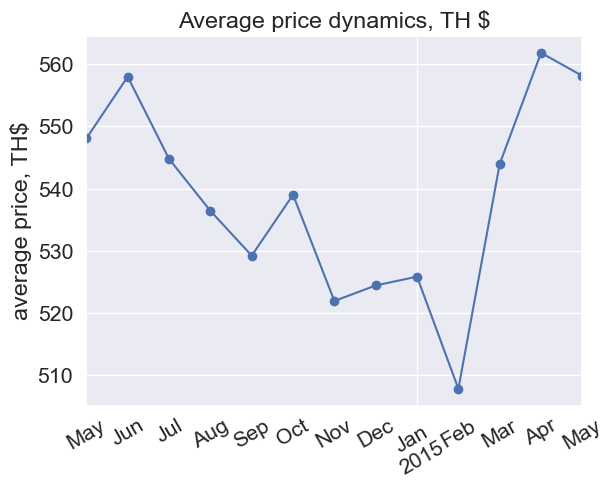

In [131]:
 # с таким типом данных матплотлиб не работает, поэтому строим в pd
monthly_mean.plot(x='datetime_month_year', y='price_TH_$',marker='o', rot=30)
plt.xlabel("")
plt.ylabel('average price, TH$')
plt.title('Average price dynamics, TH $')
plt.legend().remove();


Средняя цена продажи с мая 2014г. по февраль 2015г снижается, при этом в октябре 2014г. произошел скачек средней цены до уровня выше средней цены августа 2014г.   
После февраля 2015г. происходит ежемесячный рост средней цены с небольшим снижением в мае 2015г.